# Image Compression using Principle Component Analysis

# Name: Ashim Baral



##### Part 1: Loading and Preparing the data

In [2]:
# loading all the required libraries for image processing for PCA
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image 
#PIL is a Python Imaging Library which provides the python interpreter with image editing capabilities.

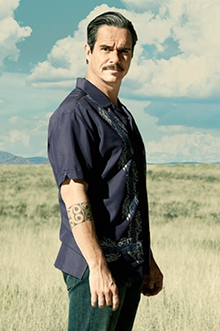

In [3]:
#importing image from the local directory
image = Image.open("lalo.png")
#converting image to numpy array
imageArr = np.array(image)
#viewing the loaded image
image

In [4]:
#checking the size of the image
image.show

<bound method Image.show of <PIL.PngImagePlugin.PngImageFile image mode=RGB size=220x331 at 0x11707A950>>

In [5]:
#checking all the properties of the image

#Displays image format i.e. png, jpg, svg etc.
print('Image Format',image.format)
#Displays image mode i.e. RBGA or CMYK
print('Image mode:', image.mode)
#Displays the datatype of the pixel
print('Pixel type:', imageArr.dtype) 
#Displays the dimension of image [Dimension-1 for Gray Scale image, Dimension-3 for RGB image]
print('Number of dimensions:', imageArr.ndim) 
#Displays the size of the array
print('Image size:', imageArr.shape)
#Displays the total size of image in an array
print('Image total size:',imageArr.size)

Image Format PNG
Image mode: RGB
Pixel type: uint8
Number of dimensions: 3
Image size: (331, 220, 3)
Image total size: 218460


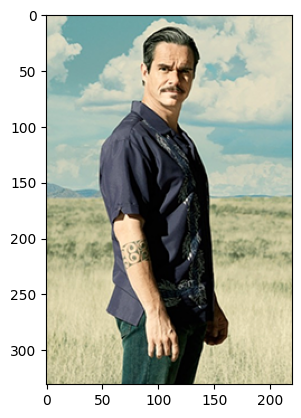

In [6]:
#cross-checking the size of the image
plt.imshow(imageArr)

As the image that I have loaded is in RGB format. Converting it to grayscale will reduce the dimensionality of the data. This will help in reducing the computation time and also the memory required to store the data. Convert(L) funtion is used to convert the image into grayscale. The image is then converted into a numpy array. The shape of the image is printed to check the dimensionality of the data.

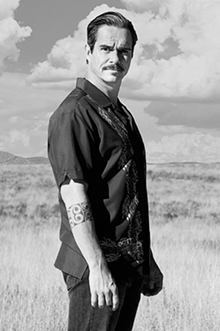

In [7]:
#converting the image to grayscale
grayImage = image.convert('L')
#converting the grayscale image to numpy array
grayImageArr = np.array(grayImage)
#viewing the grayscale image
grayImage


In [8]:
#pimage return the image in the form of array
pimage = Image.fromarray(grayImageArr)
#saving the pixel values of the image
pimage.save('laloGray.jpg')

# Part 2: Standardize/Scale the data

Now Standardizing the data to assure that the data are transformed to same scale as it is important for the data to be in same scale for PCA to work properly. StandardScaler() function is used to standardize the data. The data is then converted into a dataframe and the first 5 rows of the data is printed to check the data.

In [9]:
#checking the size of the grayscale image
grayImage.show

<bound method Image.show of <PIL.Image.Image image mode=L size=220x331 at 0x11759D7D0>>

Here the grey scale image is sin same size as the original image.

In [10]:
#Importing asarray function from numpy library 
from numpy import asarray
#Initialzing a varibale that stores the array form of data of the image
ImageInArray = asarray(pimage)
#Displays the array of the image
ImageInArray

array([[218, 218, 218, ..., 216, 217, 219],
       [219, 218, 216, ..., 212, 212, 212],
       [217, 216, 215, ..., 211, 210, 211],
       ...,
       [192, 188, 166, ..., 200, 194, 207],
       [192, 186, 178, ..., 205, 186, 207],
       [194, 190, 167, ..., 213, 201, 210]], dtype=uint8)

In [11]:
#now calculating mean, std for each pixel
#mean
mean = np.mean(ImageInArray)
#standard deviation
std = np.std(ImageInArray)
#mean and std of the image
print('Mean of the image:',mean)
print('Standard Deviation of the image:',std)

Mean of the image: 150.7933260093381
Standard Deviation of the image: 70.38815710585547


In [12]:
#now calulate the standardazation of the image
standardizedImage = (ImageInArray - mean)/std
#seeing the array of standardized image
standardizedImage

array([[0.95480087, 0.95480087, 0.95480087, ..., 0.926387  , 0.94059394,
        0.96900781],
       [0.96900781, 0.95480087, 0.926387  , ..., 0.86955926, 0.86955926,
        0.86955926],
       [0.94059394, 0.926387  , 0.91218007, ..., 0.85535233, 0.84114539,
        0.85535233],
       ...,
       [0.58542055, 0.52859281, 0.21604023, ..., 0.69907604, 0.61383443,
        0.79852459],
       [0.58542055, 0.50017894, 0.38652346, ..., 0.77011071, 0.50017894,
        0.79852459],
       [0.61383443, 0.55700668, 0.23024717, ..., 0.8837662 , 0.71328297,
        0.84114539]])

# Part 3: Calculate the Covarinace Matrix

Here the calculation of covariance matrix of image data is done. The covariance matrix is calculated using the numpy function cov(). The shape of the covariance matrix is printed to check the dimensionality of the matrix.

In [13]:
meanVec = np.mean(standardizedImage, axis=0)
#now calculating the covariance matrix
covMat = (standardizedImage - meanVec).T.dot((standardizedImage - meanVec)) / (standardizedImage.shape[0]-1)
covMat

array([[0.0763219 , 0.0763265 , 0.0695584 , ..., 0.03695797, 0.03333629,
        0.03464353],
       [0.0763265 , 0.08647416, 0.0811274 , ..., 0.03921346, 0.03651087,
        0.03751831],
       [0.0695584 , 0.0811274 , 0.08578556, ..., 0.04027957, 0.03840457,
        0.03832472],
       ...,
       [0.03695797, 0.03921346, 0.04027957, ..., 0.08061942, 0.07825234,
        0.07516411],
       [0.03333629, 0.03651087, 0.03840457, ..., 0.07825234, 0.08114743,
        0.0771906 ],
       [0.03464353, 0.03751831, 0.03832472, ..., 0.07516411, 0.0771906 ,
        0.0802312 ]])

In [14]:
#checking the shape of the covariance matrix
covMat.shape
#performing calculation check
if covMat.shape[0] == standardizedImage.shape[1]:
    print('You are Correct.')
else:
    print('Try Again')


You are Correct.


# Part 4: Eigen Decomposition

In [15]:
#asiigning the value as asked by the question
CovarianceMatrix = covMat
#calculating the eigen values and eigen vectors
eigenValues, eigenVectors = np.linalg.eig(CovarianceMatrix)


Now we see the values of eigen values and eigen vectors

In [16]:
print("Eigen Values:", eigenValues)

Eigen Values: [4.23701453e+01 2.22510689e+01 1.51934419e+01 8.28706652e+00
 6.37639558e+00 4.51349504e+00 2.82455806e+00 2.62532441e+00
 1.78465428e+00 1.65179010e+00 1.28007088e+00 1.15030042e+00
 1.03439047e+00 7.91454842e-01 7.67319468e-01 7.03156372e-01
 6.04494089e-01 5.15282407e-01 4.43879934e-01 4.05274076e-01
 3.97201874e-01 3.73593292e-01 3.42139904e-01 3.16483089e-01
 2.93314394e-01 2.74351325e-01 2.37733510e-01 2.30967217e-01
 2.14996819e-01 2.00705453e-01 1.97516981e-01 1.88984517e-01
 1.69062145e-01 1.61291464e-01 1.56146341e-01 1.46379842e-01
 1.42261125e-01 1.37522800e-01 1.28550489e-01 1.21269381e-01
 1.17758152e-01 1.08637819e-01 1.09465495e-01 1.00384145e-01
 9.87004866e-02 9.63270329e-02 9.53241575e-02 9.15397864e-02
 8.20908063e-02 8.61445711e-02 7.73730920e-02 7.14387223e-02
 6.91756008e-02 6.73289558e-02 6.59884579e-02 6.08588973e-02
 5.97381915e-02 5.71678529e-02 5.67533151e-02 4.71472331e-02
 5.20880325e-02 5.06889234e-02 4.58953826e-02 4.38338909e-02
 4.1887802

In [17]:
print("Eigen Vectors:", eigenVectors)

Eigen Vectors: [[-0.0171461  -0.01419944 -0.02403731 ...  0.07396383 -0.01620278
   0.00520653]
 [-0.01841739 -0.01683955 -0.02487349 ... -0.05427111  0.07664315
  -0.04672504]
 [-0.01934319 -0.01615712 -0.02483813 ... -0.02386835 -0.07372665
   0.04486047]
 ...
 [-0.02331564 -0.02679974 -0.00637364 ...  0.20693606  0.16838443
   0.03910856]
 [-0.02339592 -0.02272386 -0.00785088 ... -0.09363    -0.1579967
  -0.04950652]
 [-0.02308069 -0.0235742  -0.00817546 ... -0.08727806  0.10091968
   0.08989641]]


In [18]:
# creating the diagonal matrix
diagonalMatrix = np.diag(eigenValues)

diagonalMatrix

array([[4.23701453e+01, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 2.22510689e+01, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 1.51934419e+01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        3.81772430e-05, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 3.80416770e-05, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 3.47004106e-05]])

In [19]:
#calculating the inverse of Eigen Vectors
inverseEigenVectors = np.linalg.inv(eigenVectors)

inverseEigenVectors

array([[-0.0171461 , -0.01841739, -0.01934319, ..., -0.02331564,
        -0.02339592, -0.02308069],
       [-0.01419944, -0.01683955, -0.01615712, ..., -0.02679974,
        -0.02272386, -0.0235742 ],
       [-0.02403731, -0.02487349, -0.02483813, ..., -0.00637364,
        -0.00785088, -0.00817546],
       ...,
       [ 0.07396383, -0.05427111, -0.02386835, ...,  0.20693606,
        -0.09363   , -0.08727806],
       [-0.01620278,  0.07664315, -0.07372665, ...,  0.16838443,
        -0.1579967 ,  0.10091968],
       [ 0.00520653, -0.04672504,  0.04486047, ...,  0.03910856,
        -0.04950652,  0.08989641]])

In [20]:
#identifying the p components
for eval in eigenVectors.T:
    np.testing.assert_array_almost_equal(1.0, np.linalg.norm(eval))
print('Everything ok!')

Everything ok!


In [21]:
#calculating the eigen vectors
eigenVectors

array([[-0.0171461 , -0.01419944, -0.02403731, ...,  0.07396383,
        -0.01620278,  0.00520653],
       [-0.01841739, -0.01683955, -0.02487349, ..., -0.05427111,
         0.07664315, -0.04672504],
       [-0.01934319, -0.01615712, -0.02483813, ..., -0.02386835,
        -0.07372665,  0.04486047],
       ...,
       [-0.02331564, -0.02679974, -0.00637364, ...,  0.20693606,
         0.16838443,  0.03910856],
       [-0.02339592, -0.02272386, -0.00785088, ..., -0.09363   ,
        -0.1579967 , -0.04950652],
       [-0.02308069, -0.0235742 , -0.00817546, ..., -0.08727806,
         0.10091968,  0.08989641]])

In [22]:
#now making the list of eigen vectors and eigen value tuples
eigenPairs = [(np.abs(eigenValues[i]), eigenVectors[:,i]) for i in range(len(eigenValues))]
#sorting the eigen vectors and eigen values
eigenPairs.sort(key=lambda x: x[0], reverse=True)
#checking the eigen vectors and eigen values
for i in eigenPairs:
    print(i[0])

42.37014531797967
22.2510689339594
15.193441940749228
8.28706651963216
6.3763955801327405
4.51349503572687
2.824558055792057
2.6253244139957697
1.7846542839983077
1.6517901038697516
1.2800708763889066
1.1503004194658808
1.0343904733838767
0.7914548416248506
0.7673194682640591
0.7031563722069035
0.6044940893550571
0.515282407041698
0.4438799343165058
0.40527407647713104
0.3972018740649351
0.3735932922142948
0.3421399041324264
0.3164830889446427
0.2933143938066903
0.2743513245082034
0.23773351033845527
0.23096721697540762
0.21499681890321087
0.20070545261577252
0.1975169814164887
0.18898451656427914
0.1690621446596517
0.1612914644826979
0.1561463413928395
0.14637984158184114
0.14226112501134608
0.1375227999074183
0.12855048943934516
0.12126938073234157
0.11775815158384317
0.1094654950248348
0.10863781931400733
0.10038414508174476
0.09870048664979288
0.09632703286324927
0.0953241575269249
0.09153978635001848
0.0861445711104638
0.08209080634004304
0.07737309197041052
0.07143872233621368
0.

Here we can see that the value of the eigen pair is decreasing which means we are doing correct.


In [23]:
#running a final check

if covMat.all() == (eigenVectors.dot(diagonalMatrix).dot(inverseEigenVectors)).all():
    print("The values are correct")
else:
    print("Try again")

The values are correct


# Part 4: Indentyfying the Principal Components

In [24]:
#calculating the total sum of eigen values
totalSum = np.sum(eigenValues)


In [25]:
#calculating the explained variance
explainedVariance = eigenValues/totalSum
#checking the explained variance
print("Explained Variance\n", explainedVariance)

Explained Variance
 [3.44799643e-01 1.81074683e-01 1.23641147e-01 6.74384653e-02
 5.18898130e-02 3.67299065e-02 2.29856802e-02 2.13643572e-02
 1.45231543e-02 1.34419326e-02 1.04169570e-02 9.36091133e-03
 8.41765972e-03 6.44069886e-03 6.24429009e-03 5.72214384e-03
 4.91925020e-03 4.19326364e-03 3.61220481e-03 3.29803818e-03
 3.23234823e-03 3.04022638e-03 2.78426510e-03 2.57547514e-03
 2.38693300e-03 2.23261539e-03 1.93462705e-03 1.87956433e-03
 1.74960047e-03 1.63330024e-03 1.60735310e-03 1.53791764e-03
 1.37579342e-03 1.31255720e-03 1.27068723e-03 1.19120944e-03
 1.15769216e-03 1.11913263e-03 1.04611779e-03 9.86865606e-04
 9.58291936e-04 8.84072523e-04 8.90807980e-04 8.16905798e-04
 8.03204527e-04 7.83889842e-04 7.75728646e-04 7.44932201e-04
 6.68038320e-04 7.01027035e-04 6.29646518e-04 5.81353822e-04
 5.62936998e-04 5.47909376e-04 5.37000676e-04 4.95257354e-04
 4.86137277e-04 4.65220383e-04 4.61846959e-04 3.83674613e-04
 4.23881836e-04 4.12496170e-04 3.73487308e-04 3.56711307e-04
 3.4

In [26]:
#calculating the cumulative sum of the explained variance
cumulativeSum = np.cumsum(explainedVariance)
#checking the cumulative sum
print("Cumulative Sum\n", cumulativeSum)


Cumulative Sum
 [0.34479964 0.52587433 0.64951547 0.71695394 0.76884375 0.80557366
 0.82855934 0.84992369 0.86444685 0.87788878 0.88830574 0.89766665
 0.90608431 0.91252501 0.9187693  0.92449144 0.92941069 0.93360396
 0.93721616 0.9405142  0.94374655 0.94678677 0.94957104 0.95214651
 0.95453345 0.95676606 0.95870069 0.96058025 0.96232985 0.96396315
 0.96557051 0.96710842 0.96848422 0.96979678 0.97106746 0.97225867
 0.97341636 0.9745355  0.97558161 0.97656848 0.97752677 0.97841084
 0.97930165 0.98011856 0.98092176 0.98170565 0.98248138 0.98322631
 0.98389435 0.98459538 0.98522503 0.98580638 0.98636932 0.98691723
 0.98745423 0.98794948 0.98843562 0.98890084 0.98936269 0.98974636
 0.99017024 0.99058274 0.99095623 0.99131294 0.99165381 0.99197883
 0.99228978 0.99258843 0.99285464 0.99313321 0.99341032 0.99366192
 0.9938987  0.99413398 0.9943556  0.99457382 0.9947882  0.99498332
 0.99517742 0.9953685  0.99554244 0.99571856 0.99587634 0.99603745
 0.99619084 0.99633878 0.9964775  0.99661259 0

In [27]:
#calculating the number of components
numberOfComponents = np.argmax(cumulativeSum >= 0.95) + 1
#checking the number of components
print("Number of components:", numberOfComponents)


Number of components: 24


In [28]:
#running a sanity check 
if len(cumulativeSum) == len(explainedVariance):
    print("You are correct")
else:
    print("Try again")
    

You are correct


As everything done till now is correct, we can now identify the principal components. The principal components are identified by the eigen vectors. The eigen vectors are sorted in descending order of the eigen values. The first 5 eigen vectors are printed to check the principal components.

In [29]:
#printing the first five eigen vectors
print("First five eigen vectors are:\n", eigenVectors[:, :5])

First five eigen vectors are:
 [[-0.0171461  -0.01419944 -0.02403731 -0.01710161 -0.02725696]
 [-0.01841739 -0.01683955 -0.02487349 -0.02176249 -0.02490576]
 [-0.01934319 -0.01615712 -0.02483813 -0.02207688 -0.02667493]
 ...
 [-0.02331564 -0.02679974 -0.00637364  0.01888546 -0.03239255]
 [-0.02339592 -0.02272386 -0.00785088  0.02253309 -0.03197408]
 [-0.02308069 -0.0235742  -0.00817546  0.0237367  -0.03307765]]


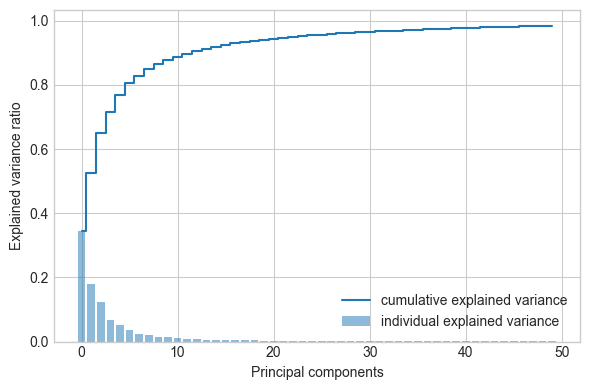

In [30]:
#now plotting the explained variance
with plt.style.context("seaborn-whitegrid"):
    plt.figure(figsize=(6, 4))
    plt.bar(range(50), explainedVariance[:50], alpha=0.5, align="center", label="individual explained variance")
    plt.step(range(50), cumulativeSum[:50], where="mid", label="cumulative explained variance")
    plt.ylabel("Explained variance ratio")
    plt.xlabel("Principal components")
    plt.legend(loc="best")
    plt.tight_layout()
    plt.show()

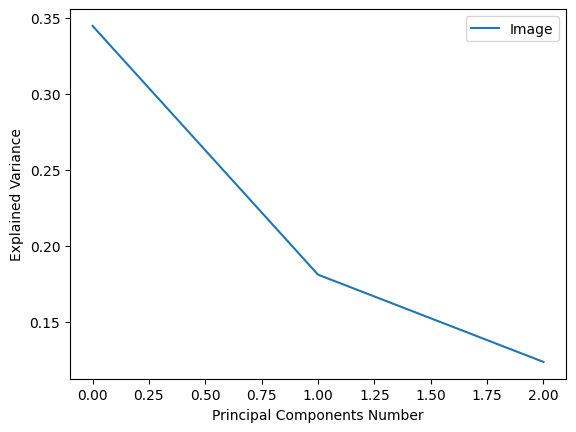

In [31]:
exp_var = explainedVariance[:3]
plt.plot(exp_var, label='Image')
plt.xlabel('Principal Components Number')
plt.ylabel('Explained Variance')
plt.legend()
plt.show()

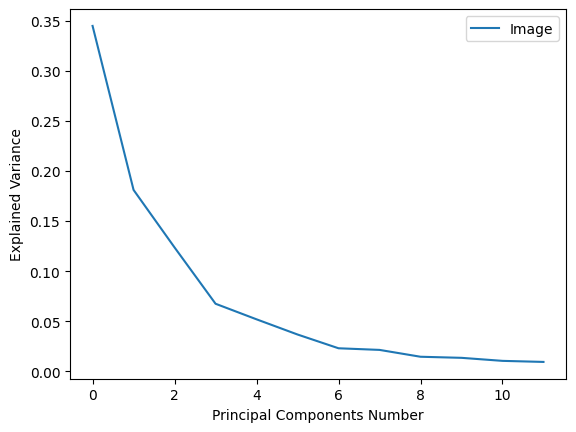

In [43]:
exp_var1 = explainedVariance[:12]
plt.plot(exp_var1, label='Image')
plt.xlabel('Principal Components Number')
plt.ylabel('Explained Variance')
plt.legend()
plt.show()

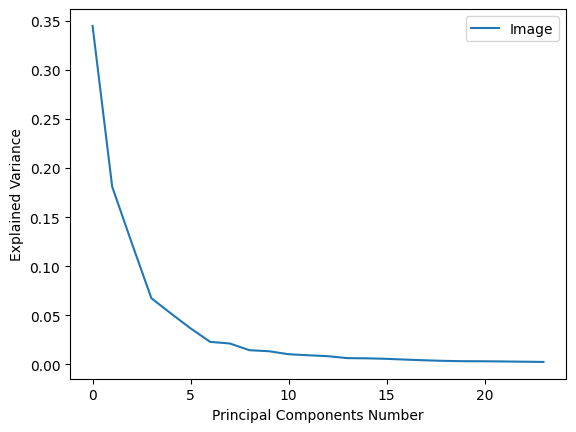

In [42]:
exp_var2 = explainedVariance[:24]
plt.plot(exp_var2, label='Image')
plt.xlabel('Principal Components Number')
plt.ylabel('Explained Variance')
plt.legend()
plt.show()

Here we have Identified the principal components and plotted the graph to see the principle component number vs the Explained variance ratio.

# Part 5: Reconstructing the Image

In [34]:
#calculating the projection matrix
projectionMatrix = eigenVectors[:, :3]
#checking the projection matrix
projectionMatrix

array([[-1.71461010e-02, -1.41994365e-02, -2.40373102e-02],
       [-1.84173887e-02, -1.68395519e-02, -2.48734938e-02],
       [-1.93431943e-02, -1.61571176e-02, -2.48381322e-02],
       [-1.81381632e-02, -1.65761193e-02, -2.63742470e-02],
       [-1.51868329e-02, -2.08738031e-02, -2.21770103e-02],
       [-1.29853305e-02, -2.05859803e-02, -1.55698402e-02],
       [-1.09309874e-02, -1.63272984e-02, -1.13704257e-02],
       [-9.37052049e-03, -1.25543519e-02, -8.31347741e-03],
       [-9.68465286e-03, -1.17405743e-02, -1.05441412e-02],
       [-9.78980994e-03, -1.15110606e-02, -1.24445996e-02],
       [-8.55326712e-03, -1.01900946e-02, -1.62858583e-02],
       [-6.85018999e-03, -1.44095865e-02, -2.13756412e-02],
       [-6.57267168e-03, -1.67780834e-02, -2.05681937e-02],
       [-4.77336806e-03, -1.62265346e-02, -1.70333986e-02],
       [-3.00527359e-03, -1.71923885e-02, -1.70083469e-02],
       [-2.48653040e-03, -2.01936375e-02, -2.16040898e-02],
       [-1.92285447e-03, -1.95954270e-02

In [35]:
#now reducing the dimension of the image
reducedDimension = standardizedImage.dot(projectionMatrix)
print("Reduced Dimension\n", reducedDimension)

Reduced Dimension
 [[-3.66524068e+00  1.51726737e+00 -1.18679175e+00]
 [-3.40334332e+00  1.28016990e+00 -1.10182679e+00]
 [-3.07954930e+00  1.04613440e+00 -1.07896127e+00]
 [-2.92404305e+00  8.09996971e-01 -1.11061218e+00]
 [-3.29837570e+00  3.99170235e-01 -1.36108544e+00]
 [-3.60781391e+00 -1.40018300e-02 -1.60792696e+00]
 [-3.95849583e+00 -5.55731106e-01 -1.81954611e+00]
 [-4.49245678e+00 -1.08699384e+00 -1.82994986e+00]
 [-5.00033942e+00 -1.37107377e+00 -1.68347549e+00]
 [-5.30012486e+00 -1.01066417e+00 -1.49639366e+00]
 [-5.80675481e+00 -9.89807024e-01 -1.51233583e+00]
 [-5.59283444e+00 -1.18505932e+00 -1.66388300e+00]
 [-3.33988489e+00 -7.08214993e-01 -1.56272836e+00]
 [-1.91706463e+00 -4.16791389e-02 -1.22751206e+00]
 [-2.03144933e+00  5.09617467e-01 -8.13541557e-01]
 [-2.73820591e+00  8.39185711e-01 -3.25640685e-01]
 [-1.97067450e+00  1.48562529e+00  1.03353652e-01]
 [-2.14218116e+00  1.31065753e+00 -2.40666321e-01]
 [-2.01403293e+00  1.22486873e+00 -1.96594739e-01]
 [-7.8828701

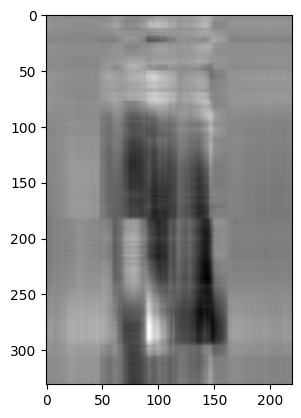

In [36]:
#now reconstructing the image
reconstructedImage = reducedDimension.dot(projectionMatrix.T)
reconstructedImg = reconstructedImage * std + mean
#checking the reconstructed image
plt.imshow(reconstructedImg, cmap='gray')

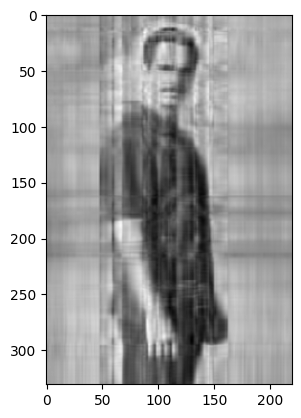

In [41]:
projectionMatrix1 = eigenVectors[:, :12]
reducedDimension1 = standardizedImage.dot(projectionMatrix1)
reconstructedImage1 = reducedDimension1.dot(projectionMatrix1.T)
reconstructedImg1 = reconstructedImage1 * std + mean
plt.imshow(reconstructedImg1, cmap='gray')

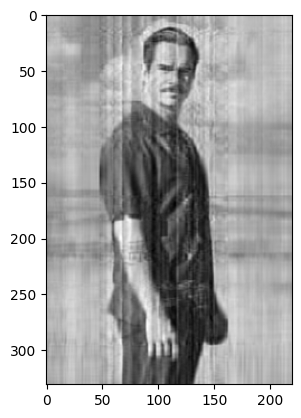

In [40]:
projectionMatrix2 = eigenVectors[:, :24]
reducedDimension2 = standardizedImage.dot(projectionMatrix2)
reconstructedImage2 = reducedDimension2.dot(projectionMatrix2.T)
reconstructedImg2 = reconstructedImage2 * std + mean
plt.imshow(reconstructedImg2, cmap='gray')


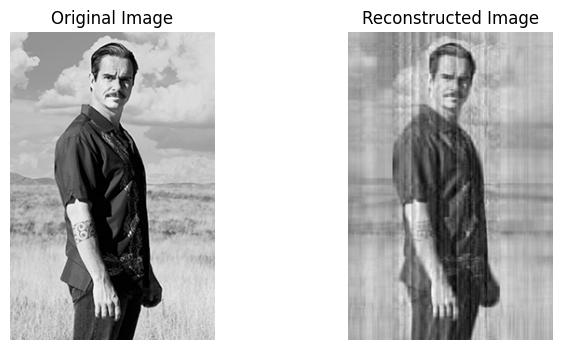

In [44]:
#displaying the reconstructed image side by side
fig, ax = plt.subplots(1, 2, figsize=(8, 4))
ax[0].imshow(ImageInArray, cmap=plt.cm.gray)
ax[0].set_title("Original Image")
ax[0].axis("off")
ax[1].imshow(reconstructedImg2, cmap=plt.cm.gray)
ax[1].set_title("Reconstructed Image")
ax[1].axis("off")
plt.show()

Here we can see that the image is reconstructed by using the 3 principle components. The image is reconstructed by using the dot product of the eigen vectors and the image data. The image is then reshaped to the original size of the image. The reconstructed image is then plotted to check the image.